## **Python for Data Analysis**
### **Módulo 3: Scipy & Statmodels**
**Andrés C. Medina Sanhueza**


Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com


**Tópicos del Curso**
1. **Módulo**
  * Scipy.
  * Statmodels.
  * Optimización.



---



## **1. Scipy**

La librería SciPy ("Scientific Python") añade una capa a NumPy sobre la que está construída
ofreciendo funciones científicas y estadísticas por encima de las funciones puramente matemáticas disponibles en ésta. Entre otras, ofrece rutinas de álgebra lineal avanzada, optimización de funciones matemáticas, procesamiento de señales y distribuciones estadísticas.

SciPy está organizada en sublibrerías que cubren diferentes áreas de especialidad. Estas sublibrerías deberán ser importadas individualmente antes de poder ser usadas. Por ejemplo, para importar la sublibrería ``constants`` deberemos ejecutar la instrucción:

In [ ]:
import scipy.constants

In [ ]:
scipy.constants.pi

3.141592653589793

In [ ]:
scipy.constants.e

1.602176634e-19

Otras librerias que se pueden importar en forma simultanea, son las siguientes:

In [ ]:
from scipy import cluster, constants, fftpack, integrate
from scipy import io, linalg, ndimage, odr, optimize
from scipy import signal, sparse, spatial, special, stats

<tr>
<td><img src="figs/scipy_sublibrerias.png" align="middle" style="width: 1000px;"/> </td>
</tr>

Para una mayor profundización de las sublibrerias de scipy, revise la documentación oficial disponible es https://docs.scipy.org/doc/scipy/reference/

### **1.1 Distribuciones Estadísticas**

Scipy viene con numerosas distribuciones de probabilidad, tanto discretas como continuas, y además pone a nuestra disposición herramientas para crear nuestras propias distribuciones y multitud de herramientas para hacer cálculos estadísticos. 

In [ ]:
import numpy as np
import scipy.stats as st

Todas las distribuciones continuas están definidas en función de dos parámetros: ``loc`` y ``scale``, que juegan distinto papel en función de la distribución que manejemos. Por ejemplo, para la normal, ``loc`` es la media y por tanto el centro de la distribución (parametro de localización) y ``scale`` es la desviación típica y puede verse como un factor de escala (parámetro de escala). 

Por otro lado, para la distribución uniforme, ``loc`` y ``scale`` son los extremos del intervalo en el que toma valores la variable.

En python, se pueden crear y manejar las distribuciones de dos formas.

* Crear un objeto que represente a la distribucion con los parámetros fijos y luego, acceder a todos sus métodos.

* Llamar en cada momento a la función que se quiere evaluar, pasando los parámetros correspondientes de manera que no se crea una distribución en concreto.

In [ ]:
# Primera forma
import numpy as np
from scipy import stats as st 

# Distribucion Normal Estandar
rv1 = st.norm()

In [ ]:
# Evaluo la funcion de distribucion en 0.5
rv1.cdf(0.5)

0.6914624612740131

In [ ]:
# Genero un vector y evaluo la pdf en el vector
x = np.linspace(0.0, 1.0)
rv1.pdf(x)

array([0.39894228, 0.39885921, 0.39861011, 0.39819528, 0.39761524,
       0.39687072, 0.39596264, 0.39489214, 0.39366054, 0.39226937,
       0.39072035, 0.38901539, 0.38715659, 0.38514623, 0.38298676,
       0.38068082, 0.37823119, 0.37564085, 0.37291289, 0.37005059,
       0.36705736, 0.36393672, 0.36069236, 0.35732807, 0.35384775,
       0.35025541, 0.34655518, 0.34275126, 0.33884794, 0.33484957,
       0.3307606 , 0.3265855 , 0.32232884, 0.31799518, 0.31358916,
       0.30911541, 0.30457861, 0.29998342, 0.29533453, 0.29063661,
       0.28589432, 0.28111231, 0.27629519, 0.27144753, 0.26657387,
       0.26167871, 0.25676648, 0.25184154, 0.24690821, 0.24197072])

In [ ]:
# Segunda forma
import numpy as np
from scipy import stats as st 

# Funcion de Distribucion de una normal estandar en 0.5 
rv1 = st.norm.cdf(0.5)

# Densidad de una normal (-1.0, 0.5) en [0.0, 1.0]
rv2 = st.norm.pdf(x,-1.0, np.sqrt(0.5))

In [ ]:
rv1

0.6914624612740131

In [ ]:
rv2

array([0.20755375, 0.19916976, 0.1909653 , 0.18294635, 0.17511819,
       0.16748543, 0.16005198, 0.15282109, 0.14579538, 0.13897686,
       0.13236692, 0.12596638, 0.11977553, 0.11379411, 0.10802137,
       0.10245611, 0.09709665, 0.09194093, 0.08698648, 0.08223049,
       0.0776698 , 0.07330098, 0.0691203 , 0.06512379, 0.06130727,
       0.05766636, 0.05419651, 0.05089303, 0.04775112, 0.04476588,
       0.04193231, 0.0392454 , 0.03670008, 0.03429126, 0.03201387,
       0.02986284, 0.02783314, 0.0259198 , 0.02411789, 0.02242256,
       0.02082904, 0.01933266, 0.01792884, 0.01661312, 0.01538113,
       0.01422864, 0.01315155, 0.01214588, 0.01120776, 0.01033349])

Esto será útil cuando se quieren hacer ajustes o estimaciones sobre los parámetros de la distribución. Un glosario que será de utilidad es el siguiente (dado que las funciones estan en inglés):

* **función de densidad de probabilidad** probability density function ``pdf``

* **función de distribución acumulada** cumulative distribution function ``cdf``

* **función de masa de probabilidad** probability mass function ``pmf``

* **generación de variables aleatorias** random variable ``rvs``


<img src="https://i.pinimg.com/originals/73/e1/6c/73e16cc2d22d77e2bb2600ae2b9c01e1.png" width=500 height=400 />

Para una mayor descripción de todas las distribuciones que están implementadas en ``scipy`` revisar la documentación oficial en https://docs.scipy.org/doc/scipy/reference/stats.html

**Semilla de números aleatorios**

Los números aleatorios son importantes en muchas aplicaciones. Desde las más básicas como puede ser seleccionar una carta al azar hasta para la creación de simulaciones de Montecarlo. La generación de números aleatorios se basa en una semilla a partir de la cual se crear una serie.

Para trabajar con números aleatorios en python, existen dos formas.

* Utilizar la función ``random.seed(seed_value)``, de la librería ``random``.
* Utilizar la función ``np.random.seed(seed_value)`` de la librería ``NumPy``.

En este curso, se utilizará np.random.seed(seed_value).





### **1.2 Distribuciones Discretas**

#### **1.2.1 Distribución Bernoulli $B(p)$**

Un experimento aleatorio tiene una distribución de probabilidad:

\begin{eqnarray*}
f(x) = p^x(1-p)^{(1-x)}\quad x\in\{ 0,1\}
\end{eqnarray*}

donde hay dos posibles resultados:

* 0, con probabilidad $1-p$
* 1, con probabilidad $p$

Cualquier experimento aleatorio con dos resultados se puede representar mediante una distribución de Bernouilli asignando a uno de los dos posibles resultados el valor 0 y al otro, el valor 1.

El siguiente código, genera variables aleatorias distribuidas bernoulli y adicionalmente, presenta un histograma.

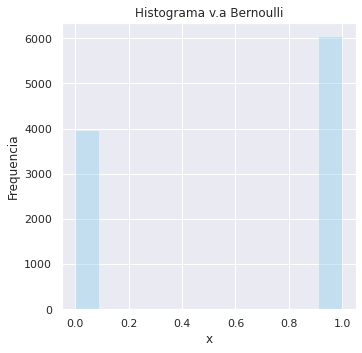

In [ ]:
from scipy.stats import bernoulli 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

# Visualizacion distribucion
ax = sns.distplot(data_bern, kde=False, color="skyblue")
ax.set(xlabel='x', ylabel='Frequencia',title="Histograma v.a Bernoulli")
plt.show()

#### **1.2.2 Distribución Binomial $B(n,p)$**

Un experimento binomial, tiene una distribución de probabilidad:

\begin{eqnarray*}
f(x) = p^x(1-p)^{(n-x)}\quad x\in\{ 0,1,2,\cdots\}
\end{eqnarray*}

Esta función se debe a que dado que tenemos un experimiento bernoulli con probabilidad $p$, el experimento se repite $n$ veces de forma independiente. Los parámetros se definen como:

* $p$ : probabilidad de ganar cada juego individual.
* $n$ : el número total de veces en que jugamos.

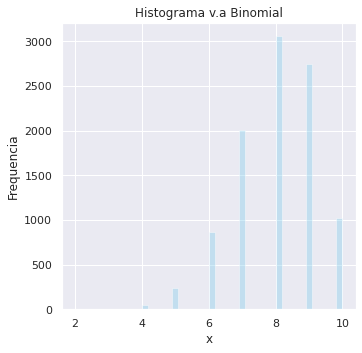

In [ ]:
from scipy.stats import binom
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos binomiales
data_binom = binom.rvs(n=10, p=0.8, size=10000)

# Visualizacion de Distribucion
ax = sns.distplot(data_binom, kde=False, color='skyblue')
ax.set(xlabel='x', ylabel='Frequencia', title="Histograma v.a Binomial")
plt.show()

#### **1.2.3 Distribución Geométrica $G(p)$**

La función de distribución geométrica, tiene la siguiente distribución de probabilidad:

\begin{eqnarray*}
f(x) = (1-p)^{(x-1)}p\quad x\in\{1,2,3 \cdots \}
\end{eqnarray*}

La distribución geométrica es un modelo adecuado para aquellos procesos en los que se repiten pruebas hasta la consecución del éxito a resultado deseado y tiene interesantes aplicaciones en los muestreos realizados de esta manera . También implica la existencia de una dicotomía de posibles resultados y la independencia de las pruebas entre sí.


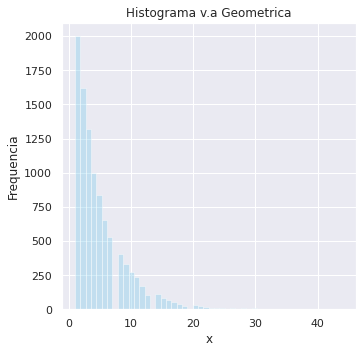

In [ ]:
from scipy.stats import geom
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos geometrica
data_geom = geom.rvs(p=0.2, size=10000)

# Visualizacion de Distribucion
ax = sns.distplot(data_geom, kde=False, color='skyblue')
ax.set(xlabel='x', ylabel='Frequencia', title="Histograma v.a Geometrica")
plt.show()

#### **1.2.4 Distribución Poisson $P(\mu)$**

La función de probabilidad poisson, tiene la siguiente expresión:

$$
\begin{eqnarray*}
p(r;\mu) = \frac{\mu^r e^{-\mu}}{r!}
\end{eqnarray*}\quad\mu\in\{0,\infty\}\quad r\in\{0,1,2,3,\cdots \} 
$$

Esta función, expresa, a partir de una frecuencia de ocurrencia media (tasa de ocurrencia), la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos ``raros``. 

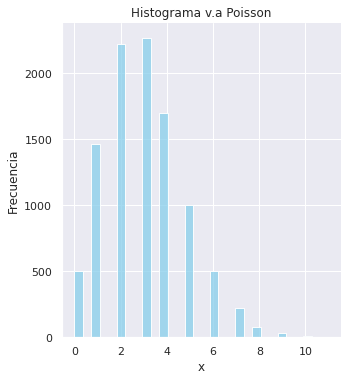

In [ ]:
from scipy.stats import poisson
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos poisson
data_poisson = poisson.rvs(mu=3, size=10000)

# Visualizacion de Distribucion
ax = sns.displot(data_poisson, bins = 30, kde=False, color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Poisson")
plt.show()

### **1.3 Distribuciones Continuas**

#### **1.3.1 Distribucion Uniforme  $\mathcal{U}(a,b)$**

La distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probable. 

La función de densidad de probabilidad, se expresa de la siguiente manera.

$$
\begin{eqnarray*}
f(x) = \frac{1}{b-a}\quad  a\leq x \leq b  \quad a,b\in\mathbb{R}
\end{eqnarray*}
$$

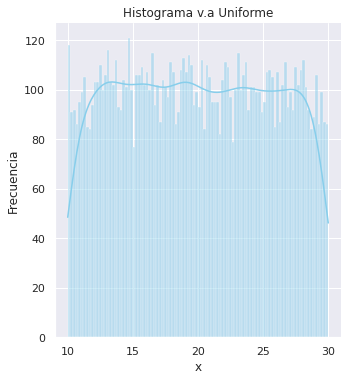

In [ ]:
from scipy.stats import uniform
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos uniformes
n = 10000
a = 10
b = 20
data_uniforme = uniform.rvs(size=n, loc=a, scale=b)

ax = sns.displot(data_uniforme,bins = 100,kde=True,color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Uniforme")
plt.show()

#### **1.3.2 Distribución Normal $\mathcal{N}(\mu,\sigma^2)$**

Dada una variable aleatoria $X$, decimos que la frecuencia de sus observaciones puede aproximarse satisfactoriamente a una normal, donde la función de densidad de probabilidad tiene el siguiente aspecto.

$$
\begin{eqnarray*}
f(x) = \frac{1}{\sqrt{2\pi\sigma}}\exp{\left( -\frac{(x-\mu)^2}{2\sigma^2}\right)}\quad  \mu,x\in\mathbb{R}\quad\sigma > 0
\end{eqnarray*}
$$

Donde, los parámetros de esta distribución, son la media o parámetro de localización $\mu$ y la desviación típica o parámetro de escala $\sigma$. 

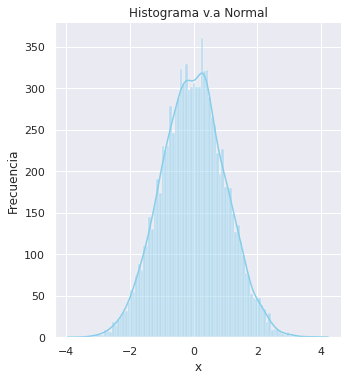

In [ ]:
from scipy.stats import norm
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos normales
data_normal = norm.rvs(size=10000, loc=0, scale=1)

# Visualizacion distribucion
ax = sns.displot(data_normal,bins = 100, kde=True, color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Normal")
plt.show()

#### **1.3.3 Distribución Exponencial $\mathcal{Exp}(\mu)$**

La distribución exponencial es una distribución continua que se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento. Esta distribución al igual que la distribución geométrica tiene la propiedad de pérdida de memoria. La distribución exponencial es un caso particular de la distribución gamma. 

Se dice que una variable aleatoria continua $X$ tiene una distribución exponencial con parámetro $\mu>0$ si su función de densidad es:

$$
\begin{eqnarray*}
f(x) = \mu\exp{\left(-\mu x\right)}\quad x\geq 0
\end{eqnarray*}
$$

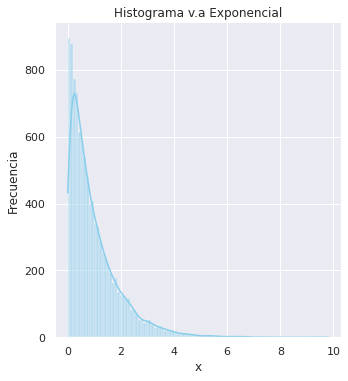

In [ ]:
from scipy.stats import expon
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos exponenciales
data_expon = expon.rvs(scale=1, loc=0, size=10000)

# Visualizacion de distribucion
ax = sns.displot(data_expon,bins = 100, kde=True, color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Exponencial")
plt.show()

#### **1.3.4 Distribución $t$-Student $t(v)$**



Sea $X$ una variable aleatoria continua y $v>0$, si $X$ tiene una distribución $t$ con $v$ grados de libertad, entonces la función de densidad viene por la siguiente expresión.

$$
\begin{eqnarray*}
f(x) = \frac{\Gamma\left(\frac{v+1}{2}\right)}{\sqrt{v\pi}\Gamma\left(\frac{v}{2}\right)}\left(1+\frac{x^2}{v}\right)^{-\frac{v+1}{2}}\quad v>0\quad x\in\left( -\infty,+\infty \right)
\end{eqnarray*}
$$

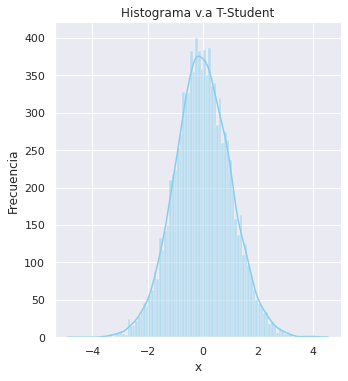

In [ ]:
from scipy.stats import t
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion datos t-student
data_t = t.rvs(50, size=10000)

# Visualizacion distribucion 
ax = sns.displot(data_t,bins = 100, kde=True, color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a T-Student")
plt.show()

#### **1.3.5 Distribución Chi-Cuadaro $\chi^{2}(k)$**

Si la variable aleatoria continua $X$ tiene una distribución $\chi^2$ con $k$ grados de libertad, entonces esta función de densidad se escribe de la siguiente forma:

$$
\begin{eqnarray*}
f(x) = \frac{\left(\frac{1}{2}\right)^{\frac{k}{2}}}{\Gamma\left(\frac{k}{2}\right)}x^{\frac{k}{2}-1}\exp{\left(-x/2\right)}\quad k\in\mathbb{N}\quad x\in\left( -\infty,+\infty \right)
\end{eqnarray*}
$$


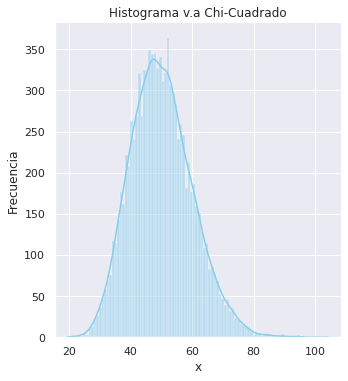

In [ ]:
from scipy.stats import chi2
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion datos chi-cuadrado
data_chi = chi2.rvs(50, size=10000)

# Visualizacion distribucion 
ax = sns.displot(data_chi, bins = 100, kde=True, color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Chi-Cuadrado")
plt.show()

#### **1.3.6 Distribución Gamma $\Gamma(\alpha,\lambda)$**

Si una variable aleatoria continua $X$, tiene distribución gamma con parámetros $\alpha>0$ y 
$\lambda > 0$ entonces, la función de densidad viene dada por la siguiente expresión.

$$
\begin{eqnarray*}
f(x) = \frac{\lambda(\lambda x)^{\alpha-1}\exp{(-\lambda x)}}{\Gamma(\alpha)} \quad \alpha>0,\lambda>0\quad x\in\left(0,\infty \right)
\end{eqnarray*}
$$

Donde $\Gamma(\alpha)$ es la función gamma y se define como:

$$
\begin{eqnarray*}
\Gamma(\alpha) = \int_{0}^{\infty} t^{\alpha-1}\exp{(-t)}dt
\end{eqnarray*}
$$
  

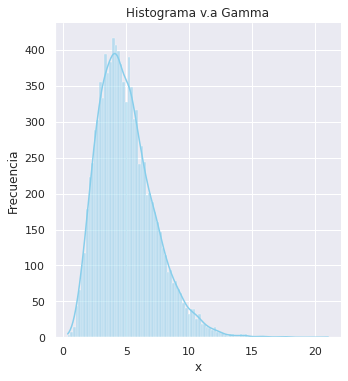

In [ ]:
from scipy.stats import gamma
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos gamma 
data_gamma = gamma.rvs(a=5, size=10000)

# Visualizacion distribucion 
ax = sns.displot(data_gamma,bins = 100,kde=True,color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Gamma")
plt.show()

#### **1.3.7 Distribución Beta $\mathcal{Be}(\alpha,\beta)$**

Si una variable aleatoria $X$ continua tiene distribución beta con parámetros $\alpha,\beta>0$ entonces la función de densidad viene dada por:

$$
\begin{eqnarray*}
f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\quad 0<x<1 
\end{eqnarray*}
$$

Donde $B(\alpha,\beta)$ es la función beta y se define para $\alpha,\beta>0$ como:

$$
\begin{eqnarray*}
B(\alpha,\beta) = \int_{0}^{1} x^{\alpha-1}(1-x)^{\beta-1}dx
\end{eqnarray*}
$$
  

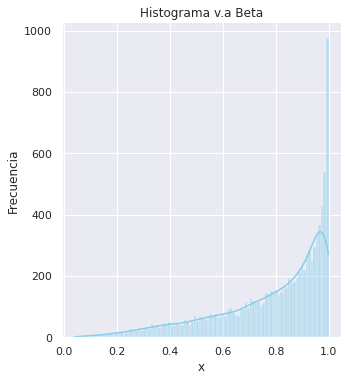

In [ ]:
from scipy.stats import beta
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla aleatoria
np.random.seed(20210730)

# Generacion de datos gamma 
data_beta = beta.rvs(a=2.31,b=0.627, size=10000)

# Visualizacion distribucion 
ax = sns.displot(data_beta,bins = 100,kde=True,color='skyblue')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma v.a Beta")
plt.show()

## **2. Ejercicios Propuestos de Simulación Estadistica**

**Definición**: Si $X$ es una variable aleatoria continua con *cdf* 
$F_{X}(x)$, entonces $X=F_{X}(x) \sim U(0,1)$. El método de transformación 
inversa para generar variables aleatorias aplica la transformación de probabilidad 
como una integral. Definamos la transformación inversa como:

\begin{eqnarray*}
F_{X}^{-1} = \inf\{x:F_{X}(x)=u\},\quad\quad 0 < u < 1
\end{eqnarray*}

Si $U\sim\mathcal{U}(0,1)$, entonces, para todo $x\in\mathbb{R}$

\begin{eqnarray*}
P(F_{X}^{-1}\leq x) &=& P(\inf\{t:F_{X}(t)=U \}\leq x)\\
  &=& P(U\leq F_{X}(x))\\
  &=& F_{U}(F_{X}(x))\\
  &=& F_{X}(x)
\end{eqnarray*}

---

**Propuesto 1:** Utilizando la definición anterior, genere 100.000 
*v.a* a partir de la  distribución exponencial de tasa $\lambda=2$ y compare resultados mediante simulación mediante la función ``expon`` de scipy.


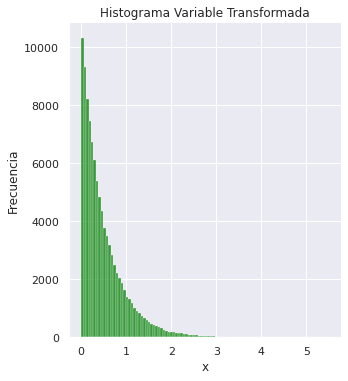

In [ ]:
from scipy.stats import uniform, expon
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla Aleatoria 
np.random.seed(20210730)

# Parametros 
n  = 100000
mu = 2
theta = 1.0/mu

# Generacion de variable aleatoria transformada
u  = uniform.rvs(size=n, loc=0, scale=1)
x  = -theta *  np.log(1-u)

# Generacion de variable aleatoria exponencial
d  = expon.rvs(scale=theta, loc=0, size=n)

# Visualizacion distribucion 
ax = sns.displot(x,bins = 100, kde=False, color='green')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma Variable Transformada")
plt.show()

In [ ]:
print("La media de la variable simulada es: ", np.mean(x).round(4), "y la varianza es: ", np.var(x).round(4))
print("La media de la variable real es: ", np.mean(d).round(4), "y la varianza es: ", np.var(d).round(4))

La media de la variable simulada es:  0.5003 y la varianza es:  0.2479
La media de la variable real es:  0.4999 y la varianza es:  0.2516


---
**Propuesto 2:** Use la transformada inversa para simular variables aleatorias
muestreadas de la distribución con densidad $f_{X}(x)=3x^2,0 <x< 1$ utilizando $n=1000$


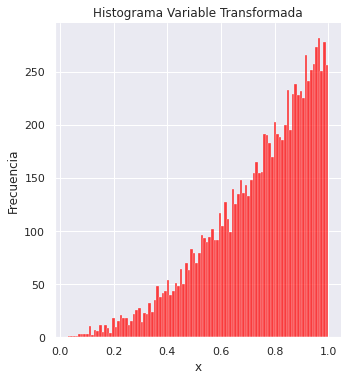

In [ ]:
from scipy.stats import uniform
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 
import random 

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla Aleatoria 
np.random.seed(20210730)

# Parametros 
n = 10000

# Generacion Variable Aleatoria 
u = uniform.rvs(size=n, loc=0, scale=1)
x = u**(1.0/3.0)

# Histograma 
ax = sns.displot(x,bins = 100, kde=False, color='red')
ax.set(xlabel="x", ylabel="Frecuencia", title="Histograma Variable Transformada")
plt.show()

---
**Propuesto 3:** Sea $U\sim\mathcal{G}(r,\lambda)$ y $V\sim\mathcal{G}(s,\lambda)$
independientes, entonces
\begin{eqnarray*}
X = \frac{U}{U+V}
\end{eqnarray*}
Tiene distribución Beta $\mathcal{Be}(r,s)$. Simule las variables $U$,$V$ y $X$ y compare
los dos primeros momentos muestrales. Tome de base una dist. $\mathcal{Be}(3,2)$ utilizando $n=1000$ y $\lambda=1$.

In [ ]:
from scipy.stats import gamma, beta
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 
import random 

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla Aleatoria 
np.random.seed(20210730)

# Parametros 
n = 1000
r = 3
s = 2

# Generacion de Variables Aleatorias Gamma 
u = gamma.rvs(a = r, loc = 0, scale = 1, size = n)
v = gamma.rvs(a = s, loc = 0, scale = 1, size = n)
x = u /(u + v)   

# Generacion de Variable Aleatoria Beta 
b = beta.rvs(a = r, b = s, size = n)

# Muestra los resultados
print("La media de la variable simulada es: ", np.mean(x).round(3), "y la varianza es: ", np.var(x).round(3))
print("La media de la variable real es: ", np.mean(b).round(3), "y la varianza es: ", np.var(b).round(3))

La media de la variable simulada es:  0.602 y la varianza es:  0.04
La media de la variable real es:  0.597 y la varianza es:  0.039


---
**Propuesto 4:** Si $Z\sim\mathcal{N}(0,1)$ entonces $V=Z^2\sim\chi^{2}(1)$. Compare CDF y PDF de la distribución simulada, versus la verdadera. Utilice un $n=10.000$

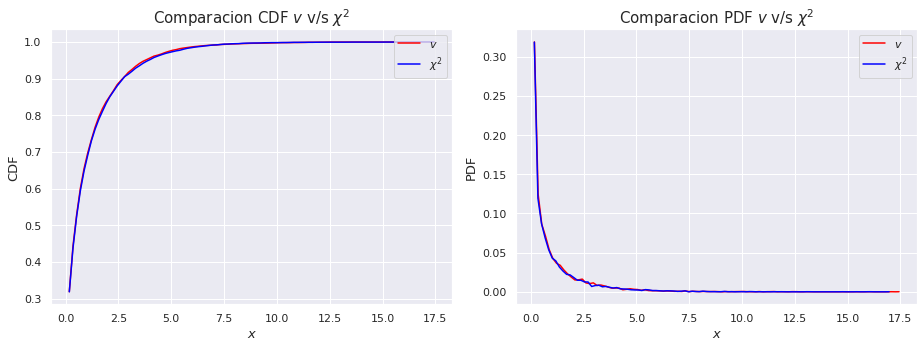

In [ ]:
from scipy.stats import norm, chi2 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import warnings 
import random 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Semilla Aleatoria 
random.seed(0)

# Parametros
n  = 10000
df = 1

# Generacion variables aleatorias
z   = norm.rvs(size=n, loc=0, scale=1)
v   = z**2
chi = chi2.rvs(1, size = n)

# De los datos, obtengo un histograma
count1, bins_count1 = np.histogram(v, bins=100)
count2, bins_count2 = np.histogram(chi, bins=100)

# Encuentro la PDF del histograma usando los count anteriores
pdf1 = count1 / sum(count1)
pdf2 = count2 / sum(count2)

# Genero la dist. acumulativa
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)

# Genero los plot de la distribucion acumulada e histogramas 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plots asociados a las curvas acumuladas
ax1.plot(bins_count1[1:], cdf1, label="$v$", color="red")
ax1.plot(bins_count1[1:], cdf2, label="$\chi^2$", color="blue")
ax1.set_xlabel("$x$", fontsize = 13)
ax1.set_ylabel("CDF", fontsize = 13)
ax1.set_title("Comparacion CDF $v$ v/s $\chi^2$", fontsize=15)
ax1.legend(loc=1)

# Plot Asociados a los histogramas 
ax2.plot(bins_count1[1:], pdf1, label="$v$", color="red")
ax2.plot(bins_count2[1:], pdf2, label="$\chi^2$", color="blue")
ax2.set_xlabel("$x$", fontsize = 13)
ax2.set_ylabel("PDF", fontsize = 13)
ax2.set_title("Comparacion PDF $v$ v/s $\chi^2$", fontsize=15)
ax2.legend(loc=1)
plt.tight_layout()

## **3. Statmodels**

``statsmodels`` es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos. 

Hay disponible una lista extensa de estadísticas de resultados para cada estimador. Los resultados se comparan con paquetes estadísticos existentes para garantizar que sean correctos. El paquete se publica bajo la licencia BSD modificada de código abierto (3 cláusulas). La documentación en línea está alojada en https://www.statsmodels.org/stable/index.html

Dos de las implementaciones de modelos de regresión lineal más utilizadas en Python son: ``scikit-learn`` y ``statsmodels``. Aunque ambas están muy optimizadas, ``Scikit-learn`` está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. Statsmodels es mucho más completo en este sentido. 

La importación de esta librería, se hace de la siguiente forma.

In [ ]:
import statsmodels.api as sms
import statsmodels.formula.api as smf

La particularidad de utilizar ``statsmodels.formula.api`` es que funciona al igual que la declaración de fórmulas al utilizar ``lm()`` en ``R`` 

<tr>
<td><img src="figs/codigo_R.png" align="middle" style="width: 1000px;"/> </td>
</tr>

Es decir, indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. 

En el caso de ``scikit-learn`` se pasan dos matrices, una con los predictores y otra con la variable respuesta.

**Ejemplo Regresión Múltiple**

Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas. 


In [ ]:
# Montando Drive para importar datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cat '/content/drive/MyDrive/Python_Data_Analysis/data/Advertising.csv' | more

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1,4.8
10,199.8,2.6,21.2,10.6
11,66.1,5.8,24.2,8.6
12,214.7,24,4,17.4
13,23.8,35.1,65.9,9.2
14,97.5,7.6,7.2,9.7
15,204.1,32.9,46,19
16,195.4,47.7,52.9,22.4
17,67.8,36.6,114,12.5
18,281.4,39.6,55.8,24.4
19,69.2,20.5,18.3,11.3
20,147.3,23.9,19.1,14.6
21,218.4,27.7,53.4,18
22,237.4,5.1,23.5,12.5


In [ ]:
! pip install lmdiag

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.api as sms
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import warnings 
import seaborn as sns 
import lmdiag
from scipy import stats
from matplotlib import pyplot as plt 

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Configuracion de warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lectura data con pandas 
data = pd.read_csv("/content/drive/MyDrive/Python_Data_Analysis/data/Advertising.csv",index_col = 0)
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# Correlaciones entre variables
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Correlaciones entre variables
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


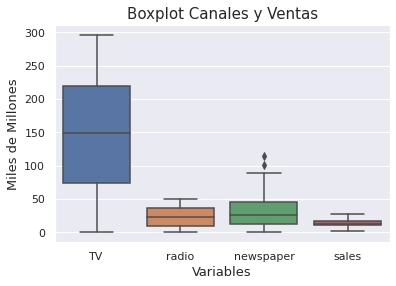

In [ ]:
# Boxplot variables
ax = sns.boxplot(x="variable", y="value", data = pd.melt(data))
ax.set_ylabel("Miles de Millones", fontsize=13)
ax.set_xlabel("Variables", fontsize=13)
ax.set_title("Boxplot Canales y Ventas", fontsize=15)
plt.show()

In [ ]:
## Creo modelo regresion lineal multiple
X = data[['TV','radio','newspaper']]
Y = data['sales']

X = sms.add_constant(X, prepend=True)
modelo = sms.OLS(Y,X)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        02:08:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

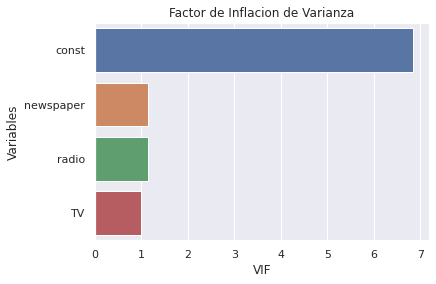

In [ ]:
# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
vif_var = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index = X.columns).sort_values(ascending=False)
sns.barplot(x=vif_var, y=vif_var.index)
plt.xlabel('VIF')
plt.ylabel('Variables')
plt.title("Factor de Inflacion de Varianza")
plt.show()

In [ ]:
# Intervalos de Confianza 
intervalos = modelo.conf_int(alpha = 0.05)
intervalos.columns = ['2.5%', '97.5%']
intervalos

,2.5%,97.5%
const,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


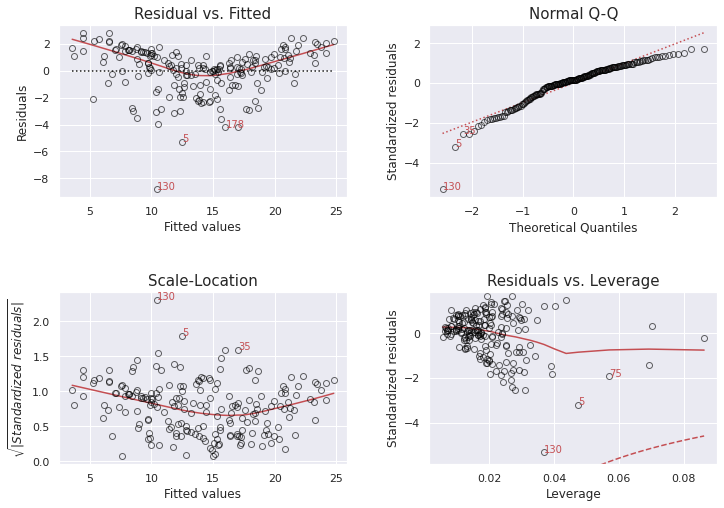

In [ ]:
# Diagnosticos de Residuos 
plt.figure(figsize=(10,7))
lmdiag.plot(modelo)
plt.show()

In [ ]:
# Test de Normalidad (Shapiro-Wilk)
shapiro_test = stats.shapiro(modelo.resid)
shapiro_test

(0.9176644086837769, 3.938041004403203e-09)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(modelo.resid)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 60.4139594552552, p-value = 7.608085583222939e-14


In [ ]:
# Test de Heterocedasticidad 
GQ_t = sm_diagnostic.het_goldfeldquandt(y = Y, x = X, alternative = "two-sided", idx = 1)
GQ_t

(0.2914723217012695, 4.966245893065588e-09, 'two-sided')

**Propuesto 5:** 

Simule el siguiente modelo utilizando las herramientas de simulación de ``scipy`` y utilice los pasos estimación y validación de un modelo estadístico visto con ``statsmodels``.

$$
\begin{eqnarray*}
Y_{i} &=& \beta_{0} + \beta_{1}X_{1,i} + \beta_{2}X_{2,i} + u_{i} \\
u_{i} &=& i\cdot\epsilon_{i}\quad \epsilon_{i}\sim\mathcal{N}(0,i^{2}\sigma^2) 
\end{eqnarray*}
$$
---



## **4. Optimizacion**

Optimización es el problema de encontrar una solución numérica a un minimización o igualdad.

El módulo ``scipy.optimize`` proporciona algoritmos útiles para la minimización de funciones (escalares o multidimensionales), ajuste de curvas y búsqueda de raices. Incluye varios algoritmos de optimización frecuentemente usados. SciPy divide las herramientas ofrecidas en varios bloques:

* Optimización
* Mínimos cuadrados y ajustes de curvas
* Búsqueda de raices
* Programación lineal
* Utilidades

In [ ]:
from scipy import optimize

**Ejemplo:** 

Considere la siguiente función, y encuentre el máximo de ella. Realice un gráfico mostrando el máximo encontrado.

$$
\begin{eqnarray*}
p(x) \propto 2e^{-(x-2)^2} + e^{-|x|} + e^{-(x+2)^2}e^{-|x+2|}
\end{eqnarray*}
$$

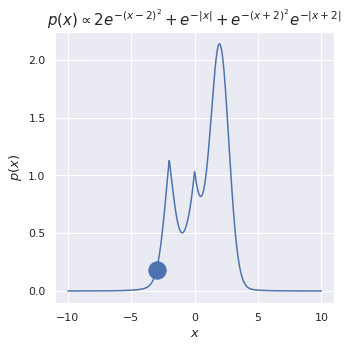

In [ ]:
from scipy import optimize
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns

# Configuracion de Seaborn
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})

# Omite warnings por desactualizacion u otro
warnings.simplefilter("ignore")

# Construyo la funcion p(x) para visualizar
def p(x):
    return (2*np.exp(-(x-2)**2) + np.exp(-np.abs(x)) + np.exp(-(x+2)**2)*np.exp(-np.abs(x+2)))

# Construyo la funcion p1(x) para optimizar
def p1(x):
    return -(2*np.exp(-(x-2)**2) + np.exp(-np.abs(x)) + np.exp(-(x+2)**2)*np.exp(-np.abs(x+2)))

# Genero datos para plotear
x = np.linspace(-10, 10, 1000)
y = p(x)

# Punto inicial 
x0 = -3

# Grafico funcion
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(x,y,'-')
ax.set_title('$p(x) \propto 2e^{-(x-2)^2} + e^{-|x|} + e^{-(x+2)^2}e^{-|x+2|}$', fontsize=15)
ax.set_xlabel('$x$', fontsize = 13)
ax.set_ylabel('$p(x)$', fontsize = 13)
ax.scatter(x0, p(x0), marker='o', s=300)
plt.show()

In [ ]:
# Encuentro minimo mediante optimize
xmax = optimize.minimize(p1, x0).x
xmax

array([1.96491254])

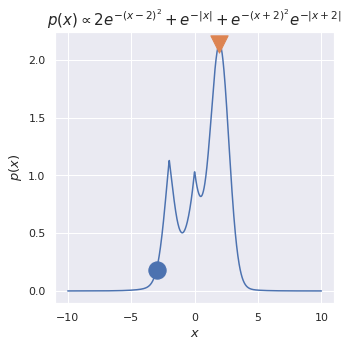

In [ ]:
# Grafico funcion y punto maximo
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(x,y,'-')
ax.set_title('$p(x) \propto 2e^{-(x-2)^2} + e^{-|x|} + e^{-(x+2)^2}e^{-|x+2|}$', fontsize=15)
ax.set_xlabel('$x$', fontsize = 13)
ax.set_ylabel('$p(x)$', fontsize = 13)
ax.scatter(x0, p(x0), marker='o', s=300)
ax.scatter(xmax, p(xmax), marker='v', s=300, zorder=20)
plt.show()

#### **4.1 Optimizacion Regresion Lineal**



**Propuesto 6**: Sea el Modelo lineal gausiano

$$ 
\begin{eqnarray*}
Y = X\beta + \epsilon
\end{eqnarray*}
$$

Luego, la media y varianza quedan caracterizadas como:

$$ 
\begin{eqnarray*}
\mathbb{E}(Y|X) &=& \mathbb{E}(X\beta + \epsilon|X) = \mathbb{E}(X\beta|X)=X\beta \\
\mathbb{V}(Y|X) &=& \mathbb{V}(X\beta + \epsilon|X) = \mathbb{V}(\epsilon|X)=\sigma^2 I
\end{eqnarray*}
$$

El proceso generador de datos y la distribución de los estimadores vienen dados por:
$$ 
\begin{eqnarray*}
Y|X &\sim& \mathcal{N}(X\beta,\sigma^2 I) \\
\hat{\beta}|X &\sim& \mathcal{N}(\beta,\sigma^2(X^{T}X)^{-1})
\end{eqnarray*}
$$

Implemente computacionalmente la log-verosimilitud del modelo de regresión lineal y corrobore los estimadores con los obtenidos mediante statsmodels.

Recordar que el MLE de un modelo de regresión lineal, es de la siguiente forma:

$$
\begin{eqnarray*}
\mathcal{l}(\beta,\sigma^2) = 
\sum_{i=1}^{n}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y_{i}-x_{i}^{\top}\beta)^2}{2\sigma^2}\right]\right)
\end{eqnarray*}
$$



In [ ]:
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

# Semilla aleatoria
np.random.seed(20210730)

# Parametros de inicializacion
N = 100
beta_0 = 3
beta_1 = 8

# Generacion de muestras aleatorias
X = np.random.normal(loc = 10, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 2, size = len(X))
Y = beta_0 + beta_1 * X + e

In [ ]:
def log_lik(par_vec, y, x):
    # Si la desviacion estandar es negativa, devuelve un numero grande
    if par_vec[2] < 0:
        return(1e8)
    # La funcion de verosimilitud se define como:
    lik = norm.pdf(y, loc = par_vec[0] + par_vec[1] * x, scale = par_vec[2])
    # Esto es similar a calcular la verosimilitud de  Y - XB
    # res = y - par_vec[0] - par_vec[1] * x
    # lik = norm.pdf(res, loc = 0, sd = par_vec[2])
    
    # Si todos los logaritmos son ceros, retorna un valor grande
    if all(v == 0 for v in lik):
        return(1e8)
    # Logaritmo de cero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

In [ ]:
import scipy.optimize as optimize
opt_res = minimize(fun = log_lik, x0 = [0, 0, 10], args = (Y, X))
print(opt_res)

      fun: 213.90749357634093
 hess_inv: array([[ 0.01160638, -0.00096676,  0.00167989],
       [-0.00096676,  0.00052478,  0.00048763],
       [ 0.00167989,  0.00048763,  0.03963194]])
      jac: array([ 0.00000000e+00, -7.62939453e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 185
      nit: 23
     njev: 37
   status: 0
  success: True
        x: array([4.45134419, 7.87592208, 2.0547133 ])


In [ ]:
# Verificacion de la estimacion por Maxima Verosimilitud
import statsmodels.api as sms
import statsmodels.formula.api as smf

X = sms.add_constant(X, prepend=True)
modelo = sms.OLS(Y,X)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5509.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           6.20e-88
Time:                        02:09:18   Log-Likelihood:                -213.91
No. Observations:                 100   AIC:                             431.8
Df Residuals:                      98   BIC:                             437.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4513      1.072      4.153      0.0